In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

Now using pandas we are gonna take the library

In [3]:
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")

We check the top 5 values with columns

In [4]:
df.head

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

Now we are going to plot charge of 
Age vs Medical Charges
BMI vs Medical Charges
Sex vs Medical Charges
Children vs Medical Charges
Smoker vs Medical Charges
Region vs Medical charges 
And in this all we use smoker as hue

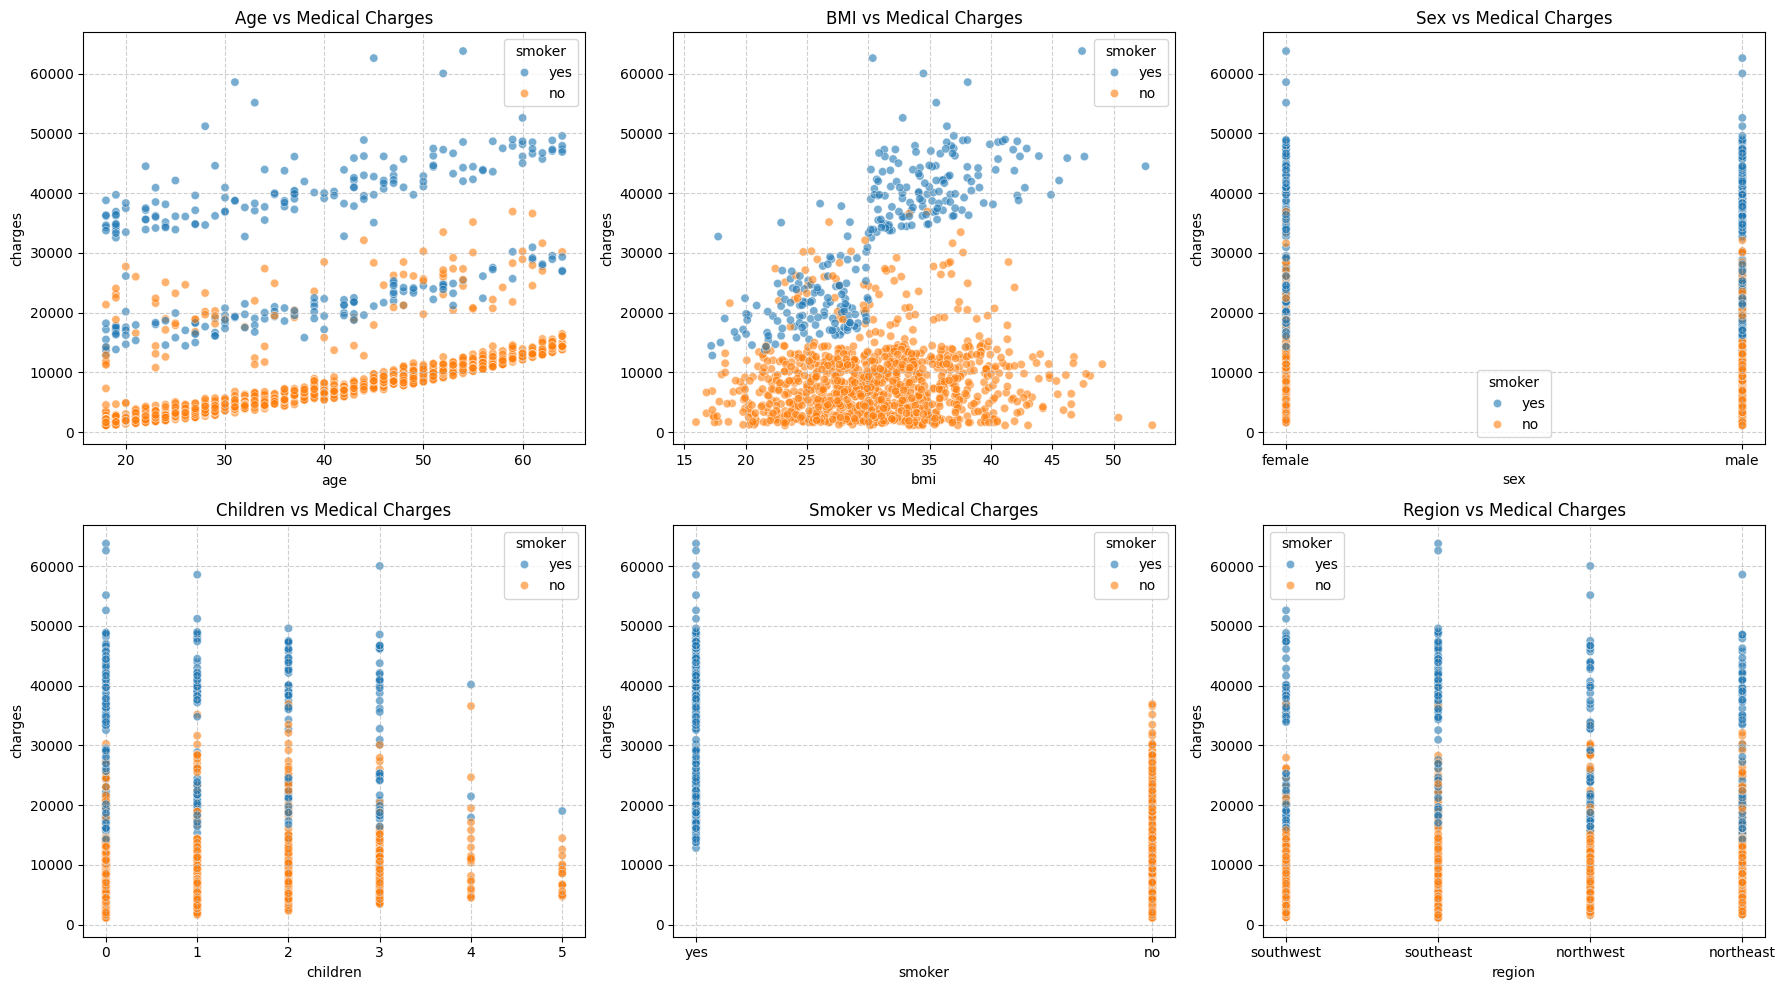

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', alpha=0.6)
plt.title('Age vs Medical Charges')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(2,3,2)
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.6)
plt.title('BMI vs Medical Charges')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(2,3,3)
sns.scatterplot(data=df, x='sex', y='charges', hue='smoker', alpha=0.6)
plt.title('Sex vs Medical Charges')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(2,3,4)
sns.scatterplot(data=df, x='children', y='charges', hue='smoker', alpha=0.6)
plt.title('Children vs Medical Charges')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(2,3,5)
sns.scatterplot(data=df, x='smoker', y='charges', hue='smoker', alpha=0.6)
plt.title('Smoker vs Medical Charges')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(2,3,6)
sns.scatterplot(data=df, x='region', y='charges', hue='smoker', alpha=0.6)
plt.title('Region vs Medical Charges')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


Now using LabelEncoder we convert
the sex, smoker, region we convert it into 
male and female to 0 and 1
if smoke then 1 otherwise 0
and region as 0,1,2,3

In [6]:
le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Now we drop the column charges from x to y 

And after that we split the train test data

In [7]:
x = df.drop(columns=['charges'], axis = 1)
y = df['charges']

x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2 , random_state=42)

Now we using model from sklearn.model_selection

In [8]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Now we are goona check predction and check r_squared and mse

In [9]:
y_pred = model.predict(x_test)

print(f"R-squared Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

print("Coeffiecientss:" , model.coef_)

R-squared Score: 0.7833463107364539
Mean Squared Error: 33635210.431178406
Coeffiecientss: [ 2.57056264e+02 -1.87914567e+01  3.35781491e+02  4.25091456e+02
  2.36478181e+04 -2.71284266e+02]


NOW, here we predict the the data 

In [10]:
#age , bmi , sex, children , smoke, region
new_data = [[30,1,25.0 , 1, 0, 3]]
prediction = model.predict(new_data)
print(f"Predicted Cost: ${prediction[0]:.2f}")

Predicted Cost: $3752.07


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
